<a href="https://colab.research.google.com/github/Sandesh10/Data-Challenge-2020/blob/master/Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team : DS20063



The types of behaviors more deeply explored in
Cycle 3 include:

 Sun safety and sun protection activities;

 Dietary intake and attention to calorie labels on restaurant menus;

 Alcohol consumption and the negative effects of alcohol;

 Physical activity, sedentary activity, and awareness of physical activity guidelines;

 Sleep patterns; and

 Tobacco use, e-cigarette use, and attitudes about e-cigarettes.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
df = pd.read_excel('data_level4.xlsx')

In [0]:
questions = {'A1': 'SeekHealthInfo', 
             'F1': 'GeneralHealth'}

In [0]:
df.head()

,HHID,PersonID,Stratum,APP_REGION,HIGHSPANLI,HISPSURNAME,HISP_HH,RUC2003,RUC2013,PR_RUCA_2010,SEC_RUCA_2010,DRA,Treatment_H5C3,NCHSURCODE2013,CENSDIV,CENSREG,VAR_STRATUM,VAR_CLUSTER,FormType,Language_Flag,QDisp,UpdateDate,AdultsInHH,MailHHAdults,SeekHealthInfo,WhereSeekHealthInfo,WhoLookingFor,LotOfEffort,Frustrated,ConfidentGetHealthInf,TrustDoctor,TrustFamily,TrustGov,TrustCharities,TrustReligiousOrgs,StrongNeedHealthInfo,StrongNeedHealthInfo_OS,SeekCancerInfo,UseInternet,Internet_DialUp,...,nwgt128,nwgt129,nwgt130,nwgt131,nwgt132,nwgt133,nwgt134,nwgt135,nwgt136,nwgt137,nwgt138,nwgt139,nwgt140,nwgt141,nwgt142,nwgt143,nwgt144,nwgt145,nwgt146,nwgt147,nwgt148,nwgt149,nwgt150,nwgt0,AgeGrpA,AgeGrpB,EducA,EducB,RaceEthn,RaceEthn5,HHInc,BMI,AgeDX,TimeSinceDX,smokeStat,PHQ4,WeeklyMinutesModerateExercise,eCigUse,AvgDrinksPerWeek,IncomeRanges_IMP
0,91000002,91000002-02,HM,NaN,2,2,2,6,6,7,7.0,1,1,6,6,3,5_3_HM,43,2,1,1,2019-03-11,1,2,2,-1,-1,-1,-1,3,1,4,3,4,4,6,-1,2,2,-1,...,22236.736430,22236.736430,22236.736430,22236.736430,22236.736430,22236.736430,22236.736430,22236.736430,22236.736430,22236.736430,22236.736430,22236.736430,22236.736430,22236.736430,22236.736430,22236.736430,22236.736430,22236.736430,22236.736430,22236.736430,22236.736430,22236.736430,22236.736430,22236.736430,4,4,1,1,2,1,1,26.3,-1,-1,3,5,0,3,0,3
1,91000006,91000006-02,HM,NaN,2,2,2,6,6,2,2.0,1,1,6,6,3,5_3_HM,42,2,1,1,2019-03-04,1,3,1,7,2,3,4,3,1,2,2,4,4,6,-1,2,1,1,...,87198.134378,87198.134378,87198.134378,87198.134378,87198.134378,87198.134378,87198.134378,87198.134378,87198.134378,87198.134378,87198.134378,87198.134378,87198.134378,87198.134378,87198.134378,87198.134378,87198.134378,87198.134378,87198.134378,87198.134378,87198.134378,87198.134378,87198.134378,87198.134378,4,2,3,3,3,2,4,28.3,-1,-1,3,0,30,3,-9,6
2,91000007,91000007-03,HM,NaN,2,2,2,6,6,8,8.1,1,1,6,6,3,5_3_HM,46,2,1,1,2019-04-08,2,-1,1,7,3,4,4,2,1,2,2,3,3,4,-1,1,1,2,...,29066.044793,29066.044793,29066.044793,29066.044793,29066.044793,29066.044793,29066.044793,29066.044793,29066.044793,29066.044793,29066.044793,29066.044793,29066.044793,29066.044793,29066.044793,29066.044793,29066.044793,29066.044793,29066.044793,29066.044793,29066.044793,29066.044793,29066.044793,29066.044793,-9,-9,-9,-9,-9,-9,-9,37.1,-6,-6,2,6,0,3,0,5
3,91000008,91000008-01,HM,S,2,2,2,3,3,1,1.0,2,1,4,6,3,5_3_HM,26,2,1,1,2019-02-11,1,2,1,6,1,3,3,3,1,2,4,3,3,6,-1,1,1,2,...,9747.840158,9747.840158,9747.840158,9747.840158,9747.840158,9747.840158,9747.840158,9747.840158,9747.840158,9747.840158,9747.840158,9747.840158,9747.840158,9747.840158,9747.840158,9747.840158,9747.840158,9747.840158,9747.840158,9747.840158,9747.840158,9747.840158,9747.840158,9747.840158,4,4,4,4,2,1,2,21.6,-1,-1,3,0,90,3,0,4
4,91000012,91000012-01,HM,S,2,2,2,6,6,4,4.0,2,1,5,6,3,5_3_HM,35,2,1,1,2019-02-12,1,2,1,7,3,4,4,1,1,2,1,2,2,7,-1,1,1,-9,...,46550.880545,46550.880545,46550.880545,46550.880545,46550.880545,46550.880545,46550.880545,46550.880545,46550.880545,46550.880545,46550.880545,46550.880545,46550.880545,46550.880545,46550.880545,46550.880545,46550.880545,46550.880545,46550.880545,46550.880545,46550.880545,46550.880545,46550.880545,46550.880545,4,2,3,3,2,1,3,28.8,-1,-1,2,1,100,1,8,5


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5438 entries, 0 to 5437
Columns: 730 entries, HHID to IncomeRanges_IMP
dtypes: datetime64[ns](1), float64(358), int64(362), object(9)
memory usage: 30.3+ MB


In [0]:
df.iloc[:,359]

0        14410.476921
1        57207.171445
2        19069.057148
3         6488.335556
4        24261.275169
            ...      
5433    129934.553680
5434    125005.434727
5435     12570.989146
5436    390263.930384
5437    162330.205471
Name: TG_all_FINWT1, Length: 5438, dtype: float64

Removing all `TG_all_` columns

In [0]:
remove_df = df.iloc[:,359:]
df = df.drop(remove_df.columns, axis=1)
df.shape

(5438, 359)

**Preprocessing**: Remove columns of type object and datetime.



In [0]:
object_cols = list(df.select_dtypes(include=['object']).columns)
object_cols

['PersonID',
 'Stratum',
 'APP_REGION',
 'VAR_STRATUM',
 'StrongNeedHealthInfo_OS',
 'HealthIns_Other_OS',
 'Caregiving_Other_OS',
 'CaOther_OS',
 'SexualOrientation_OS']

In [0]:
date_cols = list(df.select_dtypes(include=['datetime']).columns)
date_cols

['UpdateDate']

In [0]:
new_df = df.drop(object_cols, axis=1)
new_df = new_df.drop(date_cols, axis=1)
len(new_df.columns)


349

Prompt column seems to have NaN values

In [0]:
new_df.columns[new_df.isna().any()].tolist()

['Prompt']

In [0]:
new_df = new_df.drop(['Prompt'],axis =1)
len(new_df.columns), new_df.shape

(348, (5438, 348))

In [0]:
tdf = new_df[new_df['GeneralHealth']>0]
tdf['GeneralHealth'].value_counts()

3    1929
2    1925
4     727
1     630
5     126
Name: GeneralHealth, dtype: int64

In [0]:
## filtering out rows with non-missing GeneralHealth value i.e. removing negative value
genh_df = new_df[new_df['GeneralHealth']>0]
print(genh_df.shape) #(5337, 348)

#filtering out sexualorientation on generalhealth filtered data
genh_s_df = genh_df[genh_df['IntRsn_SharedSocNet']>0]
print(genh_s_df.shape)  #(5003, 348)
genh_s_df.groupby(['GeneralHealth','IntRsn_SharedSocNet']).count()


(5337, 348)
(5254, 348)


HHID  HIGHSPANLI  ...  IncomeFeelings  MAILNUM
GeneralHealth IntRsn_SharedSocNet                    ...                         
1             1                      93          93  ...              93       93
              2                     532         532  ...             532      532
2             1                     234         234  ...             234      234
              2                    1665        1665  ...            1665     1665
3             1                     204         204  ...             204      204
              2                    1690        1690  ...            1690     1690
4             1                      87          87  ...              87       87
              2                     627         627  ...             627      627
5             1                       8           8  ...               8        8
              2                     114         114  ...             114      114

[10 rows x 346 columns]

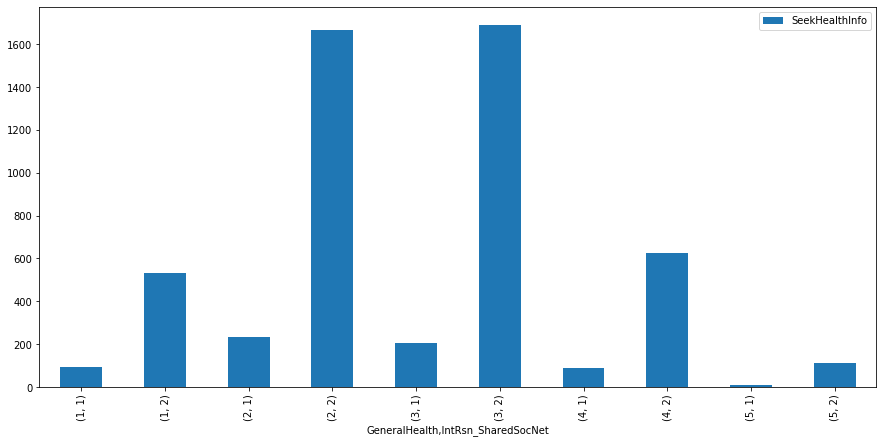

In [0]:
temp = genh_s_df[['GeneralHealth','SeekHealthInfo','IntRsn_SharedSocNet']]
temp.groupby(['GeneralHealth','IntRsn_SharedSocNet']).count().plot(kind='bar', figsize = (15,7))

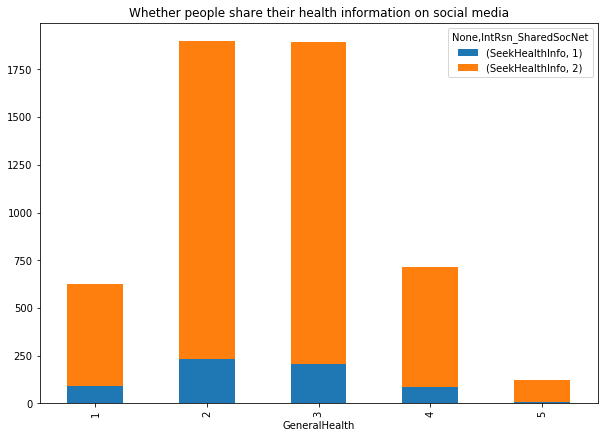

In [0]:
temp = genh_s_df[['GeneralHealth','SeekHealthInfo','IntRsn_SharedSocNet']]
ax = temp.groupby(['GeneralHealth','IntRsn_SharedSocNet']).count().unstack(level=1).plot.bar(stacked=True, 
                  title='Whether people share their health information on social media', figsize = (10,7))

**CONCLUSION**

1) People don't want to share their health information in social media site no matter what they feel about their health.

2) Only 11.91% (626) people share information on the social media

In [0]:
'''
    SeekHealthInfo
    1. YES 2. NO
''' 
genh_seekh_df = genh_df[genh_df['SeekHealthInfo']>0]
print(genh_seekh_df.shape)
genh_seekh_df.groupby(['GeneralHealth','SeekHealthInfo']).count()

(5253, 348)


HHID  HIGHSPANLI  ...  IncomeFeelings  MAILNUM
GeneralHealth SeekHealthInfo                    ...                         
1             1                502         502  ...             502      502
              2                122         122  ...             122      122
2             1               1601        1601  ...            1601     1601
              2                303         303  ...             303      303
3             1               1502        1502  ...            1502     1502
              2                389         389  ...             389      389
4             1                544         544  ...             544      544
              2                169         169  ...             169      169
5             1                 87          87  ...              87       87
              2                 34          34  ...              34       34

[10 rows x 346 columns]

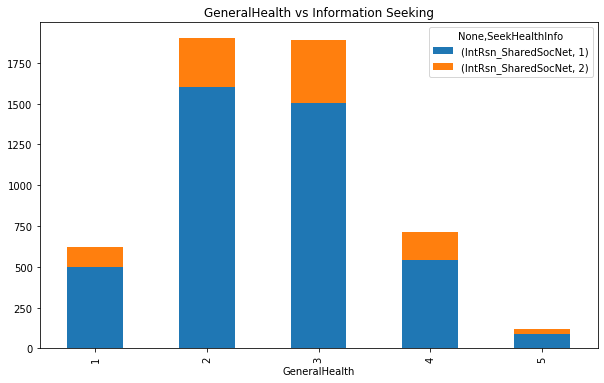

In [0]:
temp = genh_seekh_df[['GeneralHealth','SeekHealthInfo','IntRsn_SharedSocNet']]
# temp.groupby(['GeneralHealth','SeekHealthInfo']).count().plot(kind='bar', figsize = (15,7))

temp.groupby(['GeneralHealth','SeekHealthInfo']).count().unstack(level=1).plot.bar(stacked=True,
              title='GeneralHealth vs Information Seeking',figsize = (10,6))

**CONCLUSION**

1. 
        GeneralHealth      SeekHealthInfo(Y)    (N) 
        1                 80.44                 20
        2                 84.06                 15.9
        3                 79.42                 20.5
        4                 76.29                 23.7
        5                 71.90                 28.09

2. About 22% people donot seek health no matter what they feel about their health.
- Possible question: Why people who feel they have bad health don't seek health info.

In [0]:
'''
    WhereSeekHealthInfo
    1. Book   2.Brochers    3.Cancer Organization    4.Family    5.Friend/ Co-worker
    6. Doctor 7. Internet   8. Library   9. Magazines   10. Newspaper 11. Telephone
    12. Complementary, alternative or unconventional practitioner
''' 
genh_whereseekh_df = genh_df[genh_df['WhereSeekHealthInfo']>0]
print(genh_whereseekh_df.shape)
genh_whereseekh_df.groupby(['GeneralHealth','WhereSeekHealthInfo']).count()

(3759, 348)


HHID  HIGHSPANLI  ...  IncomeFeelings  MAILNUM
GeneralHealth WhereSeekHealthInfo                    ...                         
1             1                      15          15  ...              15       15
              2                       7           7  ...               7        7
              3                       3           3  ...               3        3
              4                      11          11  ...              11       11
              5                       5           5  ...               5        5
              6                      47          47  ...              47       47
              7                     344         344  ...             344      344
              8                       2           2  ...               2        2
              9                       2           2  ...               2        2
              10                      2           2  ...               2        2
              11                      3           3  ...               3        3
              12                      2           2  ...               2        2
2             1                      34          34  ...              34       34
              2                      23          23  ...              23       23
              3                       1           1  ...               1        1
              4                      37          37  ...              37       37
              5                      16          16  ...              16       16
              6                     209         209  ...             209      209
              7                    1082        1082  ...            1082     1082
              8                       6           6  ...               6        6
              9                       9           9  ...               9        9
              10                      3           3  ...               3        3
              11                      1           1  ...               1        1
              12                      9           9  ...               9        9
3             1                      35          35  ...              35       35
              2                      51          51  ...              51       51
              3                       3           3  ...               3        3
              4                      40          40  ...              40       40
              5                      16          16  ...              16       16
              6                     238         238  ...             238      238
              7                     926         926  ...             926      926
              8                       4           4  ...               4        4
              9                      11          11  ...              11       11
              10                      7           7  ...               7        7
              11                      6           6  ...               6        6
              12                      3           3  ...               3        3
4             1                      19          19  ...              19       19
              2                      13          13  ...              13       13
              3                       5           5  ...               5        5
              4                      13          13  ...              13       13
              5                      10          10  ...              10       10
              6                     132         132  ...             132      132
              7                     265         265  ...             265      265
              9                       2           2  ...               2        2
              10                      1           1  ...               1        1
              11                      8           8  ...               8        8
              12                      1           1  ...               1        1
5             1  

In [0]:
q[]

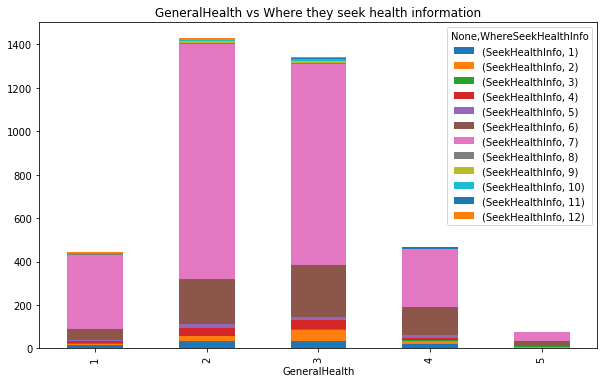

In [0]:
temp = genh_whereseekh_df[['GeneralHealth','SeekHealthInfo','WhereSeekHealthInfo']]
# temp.groupby(['WhereSeekHealthInfo']).count().plot(kind='bar', figsize = (20,7))
temp.groupby(['GeneralHealth','WhereSeekHealthInfo']).count().unstack(level=1).plot.bar(stacked=True,
              title='GeneralHealth vs Where they seek health information',figsize = (10,6))

Nothing interesting here.

People look into internet the most for healthinfo.
Doctors come second.

In [0]:
'''
    StrongNeedHealthInfo

    A7. Imagine that you had a strong need to get information about 
    health or medical topics. Where would you go first?

    1. Book   2.Brochers    3.Cancer Organization    4.Family    5.Friend/ Co-worker
    6. Doctor 7. Internet   8. Library   9. Magazines   10. Newspaper 11. Telephone
    12. Complementary, alternative or unconventional practitioner
''' 
genh_strh_df = genh_df[genh_df['StrongNeedHealthInfo']>0]
print(genh_strh_df.shape)
genh_strh_df.groupby(['GeneralHealth','StrongNeedHealthInfo']).count()

(5080, 348)


HHID  HIGHSPANLI  ...  IncomeFeelings  MAILNUM
GeneralHealth StrongNeedHealthInfo                    ...                         
1             1                        8           8  ...               8        8
              2                        3           3  ...               3        3
              4                       14          14  ...              14       14
              5                        3           3  ...               3        3
              6                      258         258  ...             258      258
              7                      293         293  ...             293      293
              8                        1           1  ...               1        1
              9                        1           1  ...               1        1
              11                       1           1  ...               1        1
              12                       5           5  ...               5        5
              91                      12          12  ...              12       12
2             1                       19          19  ...              19       19
              2                        8           8  ...               8        8
              3                        2           2  ...               2        2
              4                       65          65  ...              65       65
              5                        8           8  ...               8        8
              6                      807         807  ...             807      807
              7                      885         885  ...             885      885
              8                        8           8  ...               8        8
              9                        2           2  ...               2        2
              11                       4           4  ...               4        4
              12                       6           6  ...               6        6
              91                      20          20  ...              20       20
3             1                       20          20  ...              20       20
              2                        9           9  ...               9        9
              3                        6           6  ...               6        6
              4                       65          65  ...              65       65
              5                       14          14  ...              14       14
              6                      955         955  ...             955      955
              7                      732         732  ...             732      732
              8                       14          14  ...              14       14
              11                       6           6  ...               6        6
              12                       6           6  ...               6        6
              91                      19          19  ...              19       19
4             1                       14          14  ...              14       14
              2                        6           6  ...               6        6
              3                        3           3  ...               3        3
              4                       28          28  ...              28       28
              5                        9           9  ...               9        9
              6                      377         377  ...             377      377
              7                      226         226  ...             226      226
              8                        3           3  ...               3        3
              11                       9           9  ...               9        9
              12                       2           2  ...               2        2
              91                       7           7  ...               7        7
5             1                        1           1  ...               1        1
              3                        1           1

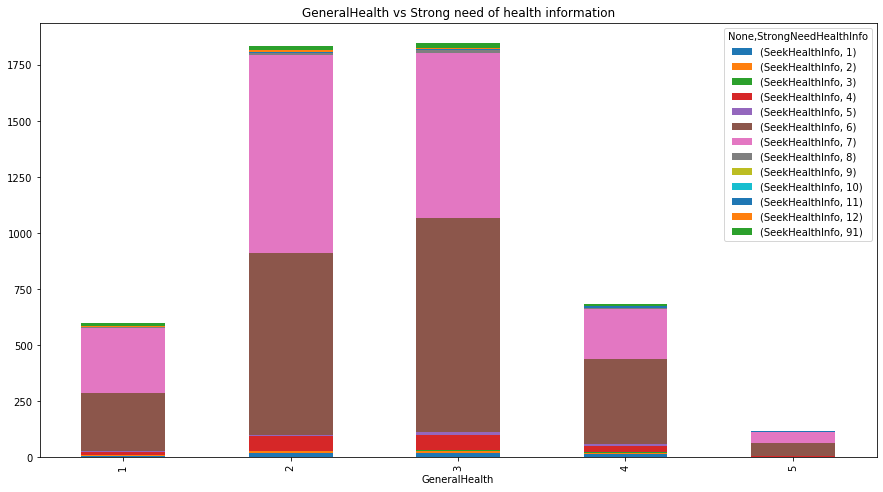

In [0]:
temp = genh_strh_df[['GeneralHealth','SeekHealthInfo','StrongNeedHealthInfo']]
# temp.groupby(['GeneralHealth','StrongNeedHealthInfo']).count().plot(kind='bar', figsize = (20,7))
temp.groupby(['GeneralHealth','StrongNeedHealthInfo']).count().unstack(level=1).plot.bar(stacked=True,
              title='GeneralHealth vs Strong need of health information',figsize = (15,8))

(5260, 348)
                                         HHID  ...  MAILNUM
GeneralHealth Electronic_SelfHealthInfo        ...         
1             1                           478  ...      478
              2                           144  ...      144
2             1                          1430  ...     1430
              2                           475  ...      475
3             1                          1304  ...     1304
              2                           596  ...      596
4             1                           446  ...      446
              2                           262  ...      262
5             1                            79  ...       79
              2                            46  ...       46

[10 rows x 346 columns]



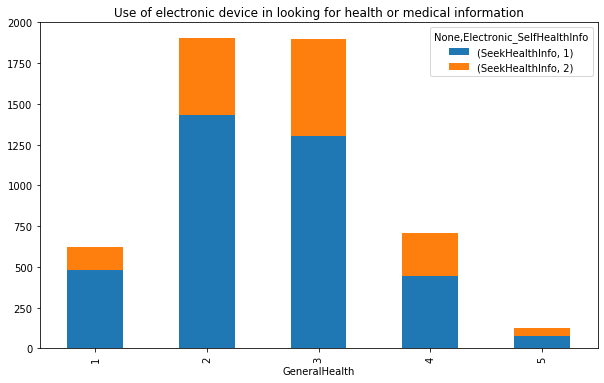

In [0]:
'''
  B5a. Electronic_SelfHealthInfo
  
  In the past 12 months have you used a computer, 
  smart phone, or other electronic means to look for health or medical information for yourself?

  1.  Yes 2. No
'''

electronic_df = genh_df[genh_df['Electronic_SelfHealthInfo']>0]
print(electronic_df.shape)
print(electronic_df.groupby(['GeneralHealth','Electronic_SelfHealthInfo']).count())
temp = electronic_df[['GeneralHealth','SeekHealthInfo','Electronic_SelfHealthInfo']]
# temp.groupby(['GeneralHealth','Electronic_ECigHarms']).count().plot(kind='bar', figsize = (15,7))
print()
temp.groupby(['GeneralHealth','Electronic_SelfHealthInfo']).count().unstack(level=1).plot.bar(stacked=True,
              title='Use of electronic device in looking for health or medical information',figsize = (10,6))

In [0]:
'''
    Frustrated

    A4b. You felt frustrated during your search for the information:

    1. Strongly Agree   2. Somewhat agree
    3. Somewhat disagree 4. Strongly disagree 
''' 
frustrated_df = genh_df[genh_df['Frustrated']>0]
print(frustrated_df.shape)
frustrated_df['Frustrated'] = frustrated_df['Frustrated'].apply(lambda x: 1 if x<=3 else 2)
frustrated_df.groupby(['GeneralHealth','Frustrated']).count()

(4054, 348)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


HHID  HIGHSPANLI  ...  IncomeFeelings  MAILNUM
GeneralHealth Frustrated                    ...                         
1             1            227         227  ...             227      227
              2            260         260  ...             260      260
2             1            896         896  ...             896      896
              2            651         651  ...             651      651
3             1            920         920  ...             920      920
              2            508         508  ...             508      508
4             1            336         336  ...             336      336
              2            172         172  ...             172      172
5             1             55          55  ...              55       55
              2             29          29  ...              29       29

[10 rows x 346 columns]

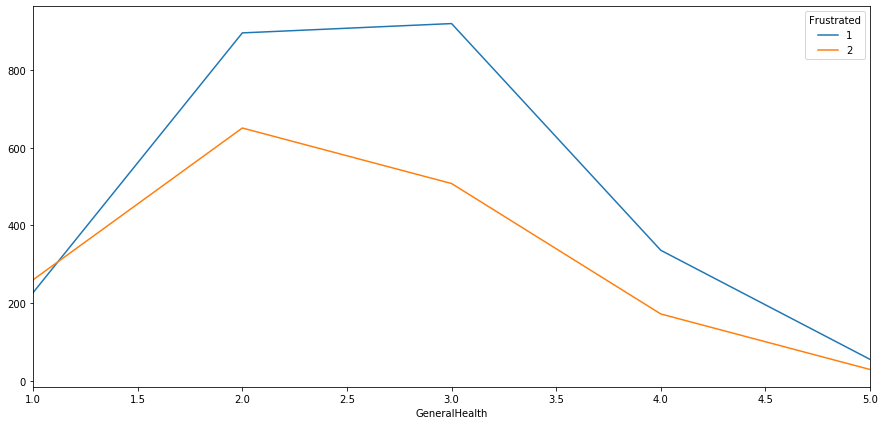

In [0]:
temp = frustrated_df[['GeneralHealth','SeekHealthInfo','Frustrated']]
# temp.groupby(['GeneralHealth','Frustrated']).count().plot(kind='bar', figsize = (15,7))
# temp['Frustrated'] = temp['Frustrated'].apply(lambda x: "Yes" if x<=3 else "No")
fig, ax = plt.subplots(figsize=(15,7))
temp.groupby(['GeneralHealth','Frustrated']).count()['SeekHealthInfo'].unstack().plot(ax=ax)

(4169, 348)
                           HHID  HIGHSPANLI  ...  IncomeFeelings  MAILNUM
GeneralHealth LotOfEffort                    ...                         
1             1             285         285  ...             285      285
              2             211         211  ...             211      211
2             1            1067        1067  ...            1067     1067
              2             515         515  ...             515      515
3             1            1075        1075  ...            1075     1075
              2             403         403  ...             403      403
4             1             391         391  ...             391      391
              2             136         136  ...             136      136
5             1              63          63  ...              63       63
              2              23          23  ...              23       23

[10 rows x 346 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


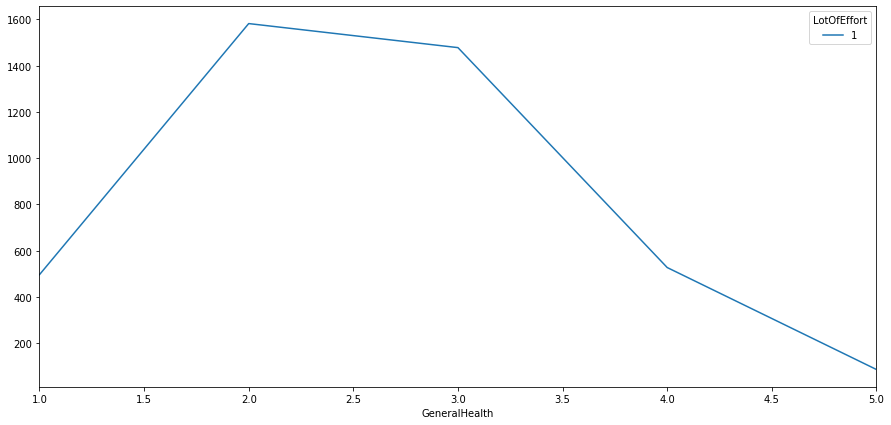

In [0]:
'''
    LotOfEffort

    A4a. It took a lot of effort to get the information you needed:

    1. Strongly Agree   2. Somewhat agree
    3. Somewhat disagree 4. Strongly disagree 
''' 
lotofeffort_df = genh_df[genh_df['LotOfEffort']>0]
print(lotofeffort_df.shape)
lotofeffort_df['LotOfEffort'] = lotofeffort_df['LotOfEffort'].apply(lambda x: 1 if x<=3 else 2)
print(lotofeffort_df.groupby(['GeneralHealth','LotOfEffort']).count())
lotofeffort_df['LotOfEffort'] = lotofeffort_df['LotOfEffort'].apply(lambda x: 1 if x<=3 else 2)
temp = lotofeffort_df[['GeneralHealth','SeekHealthInfo','LotOfEffort']]
# temp.groupby(['GeneralHealth','LotOfEffort']).count().plot(kind='bar', figsize = (15,7))
fig, ax = plt.subplots(figsize=(15,7))
temp.groupby(['GeneralHealth','LotOfEffort']).count()['SeekHealthInfo'].unstack().plot(ax=ax)

Conclusion:

37.25% people think that it's lot of effort

(5003, 348)


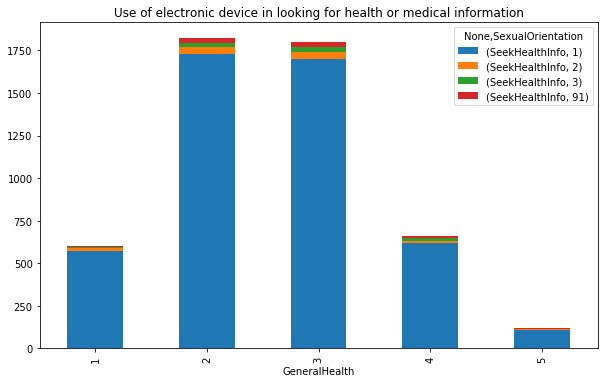

In [0]:
'''
  SexualOrientation

  O7. Do you think of yourself as...
'''

sexualo_df = genh_df[genh_df['SexualOrientation']>0]
print(sexualo_df.shape)
sexualo_df.groupby(['GeneralHealth','SexualOrientation']).count()
temp = sexualo_df[['GeneralHealth','SeekHealthInfo','SexualOrientation']]
temp.groupby(['GeneralHealth','SexualOrientation']).count().unstack(level=1).plot.bar(stacked=True,
              title='Use of electronic device in looking for health or medical information',figsize = (10,6))

# Logistic Regression Model Work starts here

In [0]:
# fig, ax = plt.subplots(figsize=(15,7))
temp = new_df[['GeneralHealth','SexualOrientation','SeekHealthInfo','WhereSeekHealthInfo', 'LotOfEffort','Frustrated','StrongNeedHealthInfo','Electronic_SelfHealthInfo','IntRsn_SharedSocNet']]
gb = temp.groupby(['GeneralHealth','SexualOrientation']).count()
gb

SeekHealthInfo  ...  IntRsn_SharedSocNet
GeneralHealth SexualOrientation                  ...                     
-9            -9                             24  ...                   24
              -7                              1  ...                    1
               1                             47  ...                   47
               2                              1  ...                    1
               91                             2  ...                    2
-7            -7                              9  ...                    9
-5            -9                              2  ...                    2
               1                             13  ...                   13
               2                              1  ...                    1
               91                             1  ...                    1
 1            -9                             24  ...                   24
              -7                              5  ...                    5
              -5                              1  ...                    1
               1                            570  ...                  570
               2                             18  ...                   18
               3                              7  ...                    7
               91                             5  ...                    5
 2            -9                             82  ...                   82
              -7                             17  ...                   17
              -5                              2  ...                    2
               1                           1727  ...                 1727
               2                             45  ...                   45
               3                             21  ...                   21
               91                            31  ...                   31
 3            -9                            122  ...                  122
              -7                              7  ...                    7
               1                           1702  ...                 1702
               2                             41  ...                   41
               3                             29  ...                   29
               91                            28  ...                   28
 4            -9                             63  ...                   63
              -7                              3  ...                    3
               1                            621  ...                  621
               2                             11  ...                   11
               3                             14  ...                   14
               91                            15  ...                   15
 5            -9                              7  ...                    7
              -7                              1  ...                    1
               1                            109  ...                  109
               2                              5  ...                    5
               3                              2  ...                    2
               91                             2  ...                    2

[42 rows x 7 columns]

In [0]:
y = new_df['GeneralHealth']
# X = df[['SeekHealthInfo','WhereSeekHealthInfo', 'LotOfEffort','Frustrated','StrongNeedHealthInfo','Electronic_SelfHealthInfo','IntRsn_SharedSocNet']]
X = new_df.iloc[:,1:]
print(X.shape, y.shape)
reg = linear_model.LinearRegression()
reg_output = reg.fit(X,y)
# print(reg_output.coef_)

"""
Correlation coefficient
[ 0.016927   -0.00145251 -0.00925201  0.00476442  0.0006391   0.04213286
  0.08240062]
"""

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
print(vif.sort_values(by=['VIF Factor'])[:100])

(5438, 347) (5438,)
     VIF Factor                        features
320    1.173696               SexualOrientation
92     1.462284           OfferedAccessInsurer2
88     1.590032                 HealthIns_Other
124    1.591291        Caregiving_HoursPerWeek2
225    1.598061                        SmokeNow
..          ...                             ...
292    4.994061     InfluenceCancer_EatingFiber
150    5.036628                WeightPerception
161    5.049760        AverageCaloriesPerDay_DK
21     5.054982                     LotOfEffort
294    5.112510  InfluenceCancer_EatingFruitVeg

[100 rows x 2 columns]


In [0]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5438 entries, 0 to 5437
Columns: 720 entries, HHID to IncomeRanges_IMP
dtypes: float64(358), int64(362)
memory usage: 29.9 MB


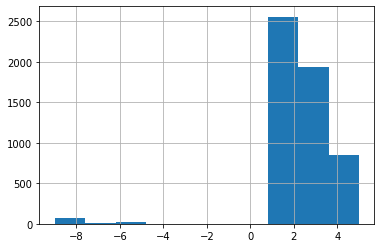

In [0]:
temp_df['GeneralHealth'].hist()

In [0]:
# df[['GeneralHealth','SeekHealthInfo','WhereSeekHealthInfo', 'LotOfEffort','Frustrated','StrongNeedHealthInfo',
#      'Electronic_SelfHealthInfo','IntRsn_SharedSocNet']].corr()

In [0]:
from scipy.stats.stats import pearsonr

pearsonr(df['GeneralHealth'],df['IntRsn_SharedSocNet'])

(0.07371053939827195, 5.2752223150136765e-08)

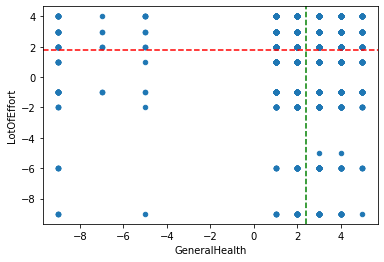

In [0]:
df.plot.scatter(x = 'GeneralHealth', y = 'LotOfEffort')
plt.axhline(df['LotOfEffort'].mean(), ls = 'dashed', color = 'r')
plt.axvline(df['GeneralHealth'].mean(), ls = 'dashed', color = 'g')

In [0]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

X = new_df[['SexualOrientation','SeekHealthInfo','WhereSeekHealthInfo', 'LotOfEffort','Frustrated','StrongNeedHealthInfo','Electronic_SelfHealthInfo','IntRsn_SharedSocNet']]
y = new_df['GeneralHealth'].values

Xc = sm.add_constant(X)
linear_regression = sm.OLS(y, Xc)
fitted_model = linear_regression.fit()
fitted_model.summary()


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     4.951
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           3.99e-06
Time:                        03:48:20   Log-Likelihood:                -10702.
No. Observations:                5438   AIC:                         2.142e+04
Df Residuals:                    5429   BIC:                         2.148e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         2.1879      0.049     44.604      0.000       2.092       2.284
SexualOrientation             0.0031      0.002      1.500      0.134      -0.001       0.007
SeekHealthInfo                0.0168      0.018      0.941      0.347      -0.018       0.052
WhereSeekHealthInfo          -0.0017      0.006     -0.277      0.781      -0.014       0.011
LotOfEffort                  -0.0090      0.015     -0.599      0.549      -0.039       0.020
Frustrated                    0.0049      0.012      0.430      0.668      -0.018       0.028
StrongNeedHealthInfo          0.0007      0.003      0.255      0.799      -0.004       0.006
Electronic_SelfHealthInfo     0.0417      0.018      2.343      0.019       0.007       0.077
IntRsn_SharedSocNet           0.0826      0.016      5.039      0.000       0.050       0.115
==============================================================================
Omnibus:                     4744.110   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           151749.177
Skew:                          -4.154   Prob(JB):                         0.00
Kurtosis:                      27.509   Cond. No.                         26.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
df_corr = new_df[['GeneralHealth','SexualOrientation','SeekHealthInfo','WhereSeekHealthInfo', 'LotOfEffort','Frustrated','StrongNeedHealthInfo','Electronic_SelfHealthInfo','IntRsn_SharedSocNet']].corr()

highlight_vals = lambda x: 'background-color: yellow' if 1>abs(x)>=0.1 else ''

df_corr.style.applymap(highlight_vals)


,GeneralHealth,SexualOrientation,SeekHealthInfo,WhereSeekHealthInfo,LotOfEffort,Frustrated,StrongNeedHealthInfo,Electronic_SelfHealthInfo,IntRsn_SharedSocNet
GeneralHealth,1,0.0203468,0.0131775,-0.00489221,-0.0044205,0.00451009,0.00651563,0.0439462,0.0737105
SexualOrientation,0.0203468,1,0.00255814,0.0198138,-0.00810194,-0.0113561,-0.000607611,0.0140939,-0.00507068
SeekHealthInfo,0.0131775,0.00255814,1,0.110004,0.222284,0.184265,0.0280548,0.0283307,0.0109732
WhereSeekHealthInfo,-0.00489221,0.0198138,0.110004,1,0.534091,0.433476,0.0675774,-0.0578062,0.0347166
LotOfEffort,-0.0044205,-0.00810194,0.222284,0.534091,1,0.70927,0.0299336,-0.0699568,0.0564747
Frustrated,0.00451009,-0.0113561,0.184265,0.433476,0.70927,1,0.020066,-0.0466642,0.089751
StrongNeedHealthInfo,0.00651563,-0.000607611,0.0280548,0.0675774,0.0299336,0.020066,1,0.103352,-0.00216234
Electronic_SelfHealthInfo,0.0439462,0.0140939,0.0283307,-0.0578062,-0.0699568,-0.0466642,0.103352,1,0.142363
IntRsn_SharedSocNet,0.0737105,-0.00507068,0.0109732,0.0347166,0.0564747,0.089751,-0.00216234,0.142363,1


In [0]:
import numpy as np
eigenvalues, eigenvectors = np.linalg.eig(df_corr)

In [0]:
eigenvalues

array([2.22014286, 0.27570114, 1.20951217, 0.58128078, 0.79107104,
       1.0312403 , 1.0060111 , 0.9476953 , 0.9373453 ])

In [0]:
pd.DataFrame(eigenvectors, index = df_corr.index)[1]

GeneralHealth               -0.004685
SexualOrientation           -0.003419
SeekHealthInfo               0.047523
WhereSeekHealthInfo          0.177070
LotOfEffort                 -0.757541
Frustrated                   0.625830
StrongNeedHealthInfo        -0.002266
Electronic_SelfHealthInfo   -0.015130
IntRsn_SharedSocNet         -0.024270
Name: 1, dtype: float64

In [0]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression(normalize=False, fit_intercept=True)
linear_regression.fit(X,y)
(pd.DataFrame(linear_regression.coef_, index = X.columns, columns = ['coef']).abs()).sort_values('coef', ascending = 0)


,coef
IntRsn_SharedSocNet,0.082554
Electronic_SelfHealthInfo,0.041727
SeekHealthInfo,0.016805
LotOfEffort,0.009015
Frustrated,0.004945
SexualOrientation,0.003080
WhereSeekHealthInfo,0.001734
StrongNeedHealthInfo,0.000654


Top 15 columns correlated to `GeneralHealth` [Without any filtering]

In [0]:
corr_matrix = temp_df.corr()
corr_matrix['GeneralHealth'].sort_values(ascending=False)[:15]

GeneralHealth                   1.000000
OwnAbilityTakeCareHealth        0.760320
Deaf                            0.653810
TalkHealthFriends               0.653668
AvoidDoc                        0.642570
MedConditions_LungDisease       0.585085
MedConditions_HeartCondition    0.549539
Height_Feet                     0.538949
MedConditions_Depression        0.510245
MedConditions_Diabetes          0.488967
MedConditions_HighBP            0.482764
BMI                             0.453108
WeightIntention                 0.423859
Weight                          0.397561
WeightPerception                0.372735
Name: GeneralHealth, dtype: float64

In [0]:
# df_358 = temp_df[:358]
# corr_matrix = df_358.corr()
# corr_matrix['GeneralHealth'].sort_values(ascending=False)[:15]

# plt.figure(figsize=(12,10))
# # cor = df1.corr()
# sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
# plt.show()

Top 15 columns correlated to 'GeneralHealth' [removing all the missing values - -9, -7 and -5 from generalhealth field]

In [0]:
df1_all_filtered = temp_df[temp_df['GeneralHealth']>=1 & (temp_df['GeneralHealth']<=3)]
corr_matrix = df1_all_filtered.corr()
corr_matrix['GeneralHealth'].sort_values(ascending=False)[:15]

GeneralHealth               1.000000
OwnAbilityTakeCareHealth    0.473201
PHQ4                        0.263895
BMI                         0.211262
FreqGoProvider              0.186089
Weight                      0.185316
AverageCaloriesPerDay_DK    0.163594
QualityCare                 0.155030
Age                         0.123810
EnjoyExercise               0.123416
AverageSleepQuality         0.120655
AgeDX                       0.097391
WhenDiagnosedCancer         0.097391
AdultsInHH                  0.092908
SmokeNow                    0.090713
Name: GeneralHealth, dtype: float64

In [0]:
df1 = temp_df[['GeneralHealth','SeekHealthInfo','WhereSeekHealthInfo', 'LotOfEffort','Frustrated','StrongNeedHealthInfo',
              #  'StrongNeedHealthInfo_OS', (removed coz this is a object field and it details other option)
               'Electronic_SelfHealthInfo','IntRsn_SharedSocNet']]

In [0]:
df1.head()

,GeneralHealth,SeekHealthInfo,WhereSeekHealthInfo,LotOfEffort,Frustrated,StrongNeedHealthInfo,Electronic_SelfHealthInfo,IntRsn_SharedSocNet
0,4,2,-1,-1,-1,6,2,2
1,3,1,7,3,4,6,2,2
2,4,1,7,4,4,4,1,2
3,2,1,6,3,3,6,1,2
4,2,1,7,4,4,7,1,2


In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5438 entries, 0 to 5437
Data columns (total 8 columns):
GeneralHealth                5438 non-null int64
SeekHealthInfo               5438 non-null int64
WhereSeekHealthInfo          5438 non-null int64
LotOfEffort                  5438 non-null int64
Frustrated                   5438 non-null int64
StrongNeedHealthInfo         5438 non-null int64
Electronic_SelfHealthInfo    5438 non-null int64
IntRsn_SharedSocNet          5438 non-null int64
dtypes: int64(8)
memory usage: 340.0 KB


In [0]:
df1_filtered = df1[df1['GeneralHealth']>=1]
df1_verygood = df1[df1['GeneralHealth']==2]
# df1_good = df1[df1['GeneralHealth']==3]
# df1_fine = df1[df1['GeneralHealth']==4]
# df1_poor = df1[df1['GeneralHealth']==5]

In [0]:
df1_filtered['GeneralHealth'].value_counts()

3    1929
2    1925
4     727
1     630
5     126
Name: GeneralHealth, dtype: int64

In [0]:
# df1_generalhealth = [df1_excellent,df1_verygood, df1_good, df1_fine, df1_poor]
# df1_excellent.reset_index()
type(df1_excellent)


pandas.core.frame.DataFrame

In [0]:
corr_matrix = df1_filtered.corr()
print(corr_matrix['GeneralHealth'].sort_values(ascending=False))

GeneralHealth                1.000000
Electronic_SelfHealthInfo    0.007927
SeekHealthInfo              -0.021929
IntRsn_SharedSocNet         -0.022083
StrongNeedHealthInfo        -0.033357
WhereSeekHealthInfo         -0.072429
LotOfEffort                 -0.114275
Frustrated                  -0.114429
Name: GeneralHealth, dtype: float64


In [0]:
df1_filtered_1to3 = df1[(df1['GeneralHealth']>=1)]
corr_matrix = df1_filtered_1to3.corr()
print(corr_matrix['GeneralHealth'].sort_values(ascending=False))

GeneralHealth                1.000000
Electronic_SelfHealthInfo   -0.000748
SeekHealthInfo              -0.004548
IntRsn_SharedSocNet         -0.011616
StrongNeedHealthInfo        -0.026580
Frustrated                  -0.056598
WhereSeekHealthInfo         -0.064888
LotOfEffort                 -0.075066
Name: GeneralHealth, dtype: float64


Correlation of each features with `GeneralHealth`

In [0]:
# df1[df1.columns[1:]].corr()[df1.columns[0]][:]

corr_matrix = df1.corr()
print(corr_matrix['GeneralHealth'].sort_values(ascending=False))

GeneralHealth                1.000000
IntRsn_SharedSocNet          0.073711
Electronic_SelfHealthInfo    0.043946
SeekHealthInfo               0.013178
StrongNeedHealthInfo         0.006516
Frustrated                   0.004510
LotOfEffort                 -0.004420
WhereSeekHealthInfo         -0.004892
Name: GeneralHealth, dtype: float64


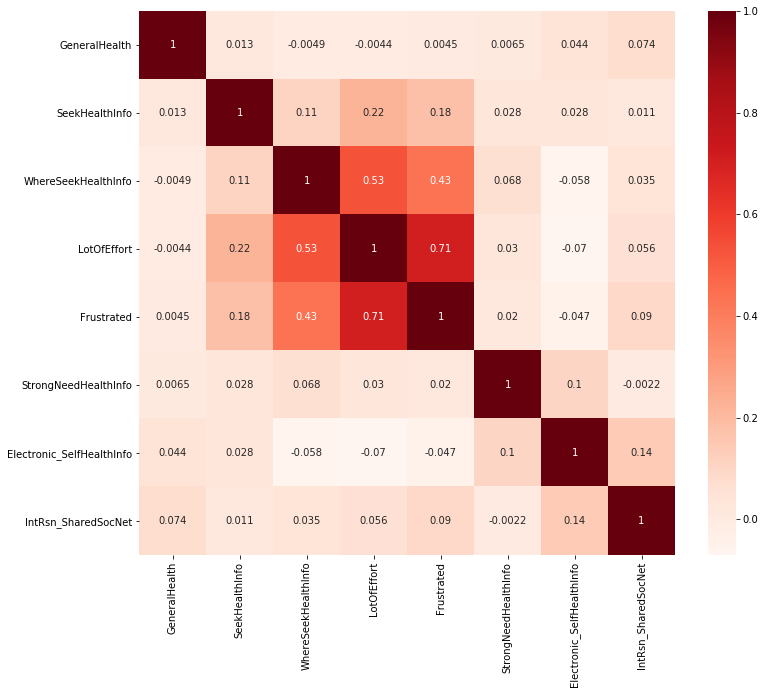

In [0]:


#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [0]:
# corr = df1.corr()
# corr.head()

Plotting the data to visualize their distribution

Note: I am not sure how useful this would be.
Reference: https://www.kaggle.com/bbloggsbott/feature-selection-correlation-and-p-value

In [0]:
selected_columns = df[1:].values

import statsmodels.api as sm

def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5438 entries, 0 to 5437
Columns: 730 entries, HHID to IncomeRanges_IMP
dtypes: datetime64[ns](1), float64(358), int64(362), object(9)
memory usage: 30.3+ MB


In [0]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5438 entries, 0 to 5437
Columns: 720 entries, HHID to IncomeRanges_IMP
dtypes: float64(358), int64(362)
memory usage: 29.9 MB


In [0]:
newdf = newdf.replace([np.inf, -np.inf], np.nan)
newdf =  newdf.replace(-np.inf, np.nan)

df = df.drop(np.nan)
df[df.isin([np.nan, np.inf, -np.inf]).any(1)]


KeyError: ignored

In [0]:
import numpy as np

SL = 0.01
data_modeled, selected_columns = backwardElimination(newdf.iloc[:,1:].values, newdf.iloc[:,0].values, SL, selected_columns)

MissingDataError: ignored

In [0]:
result = pd.DataFrame()
result['GeneralHealth'] = df1.iloc[:,0]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


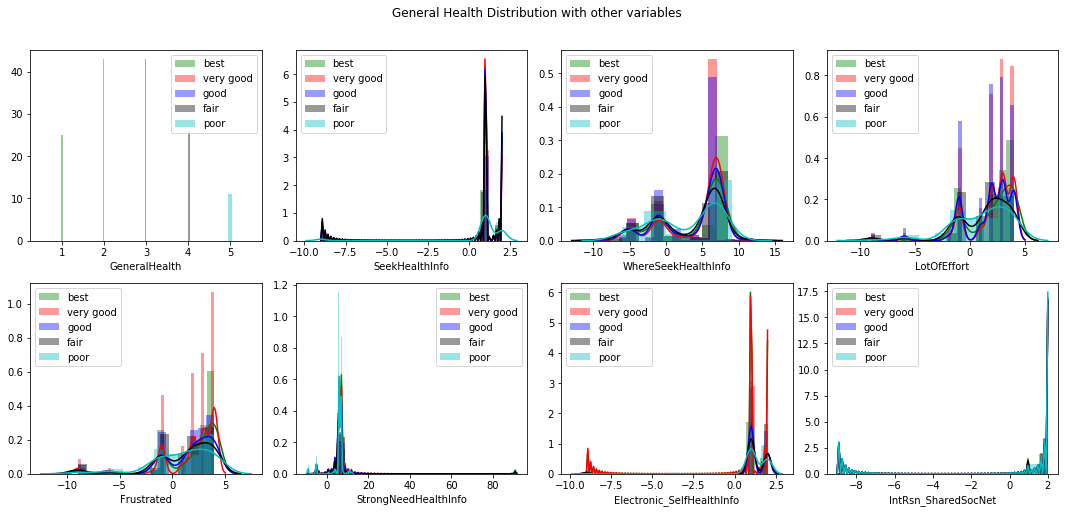

In [0]:
# data = pd.DataFrame(data = data_modeled, columns = selected_columns)

fig = plt.figure(figsize = (15, 20))
j = 0
for i in df1.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(df1[i][result['GeneralHealth']==1], color='g', label = 'best')
    sns.distplot(df1[i][result['GeneralHealth']==2], color='r', label = 'very good')
    sns.distplot(df1[i][result['GeneralHealth']==3], color='b', label = 'good')
    sns.distplot(df1[i][result['GeneralHealth']==4], color='k', label = 'fair')
    sns.distplot(df1[i][result['GeneralHealth']==5], color='c', label = 'poor')
    plt.legend(loc='best')
fig.suptitle('General Health Distribution with other variables')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [0]:
result = pd.DataFrame()
result['diagnosis'] = df1.iloc[:,0]

In [0]:
# df1[df1.columns[1:]].corr()[df1['GeneralHealth']][:]

# from pandas.plotting import scatter_matrix

# attributes = df1[df1.columns[1:]]
# scatter_matrix(attributes, figsize=(12, 8))

# X.corr().unstack().sort_values().drop_duplicates()


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

model = LinearRegression()

model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X = df1.drop("GeneralHealth",1)
y = df1['GeneralHealth']
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)


[ True  True  True  True  True  True  True]
[1 1 1 1 1 1 1]
